# Basics

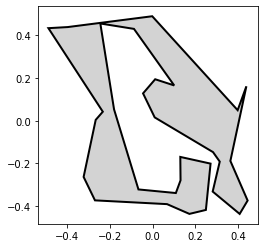

In [2]:
import skgeom as sg
poly = sg.random_polygon(30, seed=3)
poly

`simplify` tries to remove a given portion of the vertices without changing the topology:

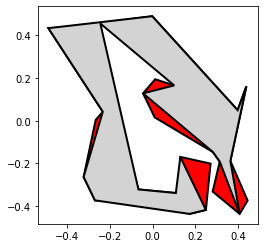

In [37]:
sg.draw.draw(poly, facecolor="red")
sg.simplify(poly, 0.5)  # try to remove 50% of the vertices

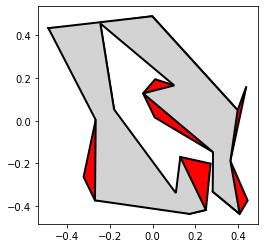

In [38]:
sg.draw.draw(poly, facecolor="red")
sg.simplify(poly, 0.2)  # try to remove 80% of the vertices

`simplify` works on `Polygon`, `PolygonWithHoles` and `PolygonSet`. You can also apply `simplify` on lists of polygons.

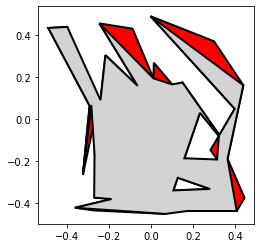

In [145]:
poly = sg.PolygonSet([sg.random_polygon(10, seed=4), sg.random_polygon(40, seed=3)])
sg.draw.draw(poly, facecolor="red")
sg.simplify(poly, 0.5)

# Modes

`simplify` currently supports three modes:
* "ratio": try to reduce number of vertices to a given ratio of the original count
* "count": try to reduce number of vertices to an absolute number
* "sqeuclidean": try to reduce number of vertices until the error (squared euclidean distance) becomes too big

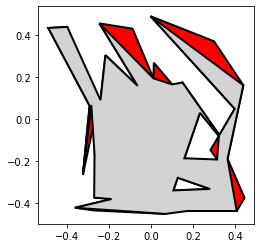

In [149]:
sg.draw.draw(poly, facecolor="red")
sg.simplify(poly, 0.5, "ratio")  # try to remove 50% of vertices

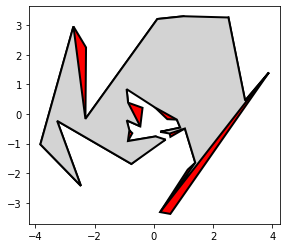

In [182]:
sg.draw.draw(poly, facecolor="red")
sg.simplify(poly, 0.2, "sqeuclidean")  # try to remove while err (sq. distance) < 0.2

In general, all modes are targets that might not be met:

In [184]:
len(poly.outer_boundary())

41

In [185]:
len(sg.simplify(poly, 0.5, "ratio").outer_boundary())

27

In [186]:
len(sg.simplify(poly, 0.25, "ratio").outer_boundary())

24

In [189]:
len(sg.simplify(poly, 5, "count").outer_boundary())

22

# Topology

By default, `simplify` tries to preserve topology.

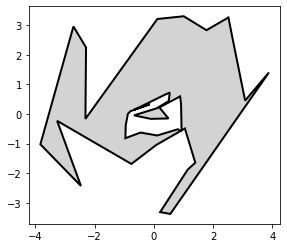

In [201]:
from skgeom import boolean_set
poly = boolean_set.difference(
    sg.random_polygon(20, size=4, seed=4234),
    sg.random_polygon(20, size=1, seed=8421))[0]
poly

By preserving topology, features like holes will not get lost:

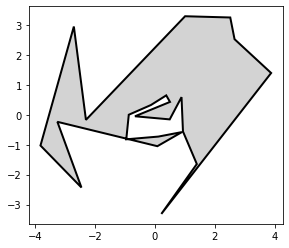

In [204]:
poly2 = sg. simplify(poly, 0.2, "ratio")  # try to remove 50% of vertices
poly2

Turning off `preserve_topology` is much faster, but might destroy structural features:

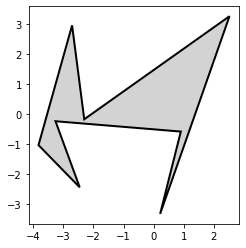

In [205]:
poly2 = sg. simplify(poly, 0.2, "ratio", preserve_topology=False)
poly2

`preserve_topology` implies limits to how much simplifcation can happen:

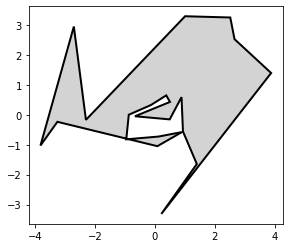

In [211]:
poly2 = sg. simplify(poly, 1, "count")
poly2

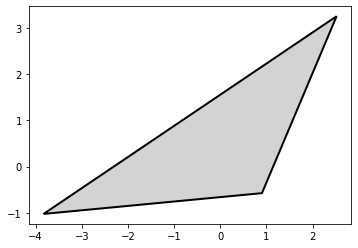

In [209]:
poly2 = sg. simplify(poly, 1, "count", preserve_topology=False)
poly2

# More Topology

In [31]:
nested = [sg.random_polygon(15, shape="circle", size=r ** 3, seed=r * 5) for r in range(3, 10)]

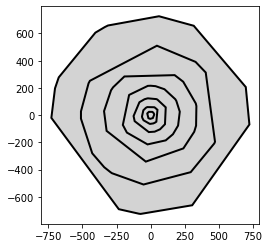

In [35]:
def draw_nested(nested):
    for p in reversed(nested):
        sg.draw.draw(p)
        
draw_nested(nested)

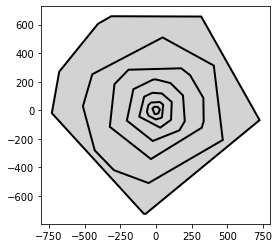

In [40]:
draw_nested(sg.simplify(nested, 0.3))

with defaults, forms have been simplified while preserving topology:

In [45]:
def n_vertices(nested):
    return sum(len(p) for p in nested)

(n_vertices(nested), n_vertices([p.outer_boundary() for p in sg.simplify(nested, 0.3)]))

(105, 59)

same call without preserving topology:

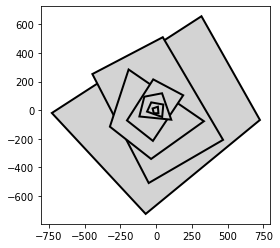

In [41]:
draw_nested(sg.simplify(nested, 0.3, preserve_topology=False))